In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [2]:
df=pd.read_csv('homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
from sklearn import preprocessing
sx=preprocessing.MinMaxScaler()
sy=preprocessing.MinMaxScaler()

In [4]:
xscale=sx.fit_transform(df.drop('price',axis='columns'))
yscale=sy.fit_transform(df.price.values.reshape(df.shape[0],1))

In [66]:
xscale


array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [5]:
def batchgradient(x,ytrue,epoch,r):
    w=np.ones(shape=x.shape[1])
    b=0
    total_sample=x.shape[0]
    costlist=[]
    epochlist=[]
    for i in range(epoch):
        ramdom_index=random.randint(0,total_sample-1)
        samplex=x[ramdom_index]
        sampley=ytrue[ramdom_index]
        ypredict=np.dot(w,samplex.T)+b
        w_grad = -(2/total_sample)*(samplex.T.dot(sampley-ypredict))
        b_grad = -(2/total_sample)*np.sum(sampley-ypredict)
        
        w = w - r* w_grad
        b = b - r* b_grad
        
        cost= np.mean(np.square(sampley-ypredict))
        
        if i%50==0:
            costlist.append(cost)
            epochlist.append(i)
        
    return w,b,costlist,epochlist
    

In [6]:
w,b,costlist,epochlist=batchgradient(xscale,yscale.reshape(yscale.shape[0],),1100,0.1)
w,b,costlist,epochlist

(array([0.70798916, 0.67667668]),
 -0.21596812926375503,
 [0.24846978171195375,
  0.08713802359669838,
  0.20215783933953768,
  0.014611812754256173,
  0.00635898714822823,
  0.004623432846385453,
  0.001307913754847491,
  0.0017140568631822724,
  0.010709036503615623,
  0.007152733655448649,
  0.020044093601636396,
  0.005832271113188588,
  2.194960614053965e-06,
  0.005662240449807911,
  0.000423661458007924,
  0.004142908588237581,
  0.0028335601906200594,
  0.00789408473454196,
  0.0009013016206524803,
  0.0002473097641066221,
  0.0013640766419823842,
  5.453209433742417e-05],
 [0,
  50,
  100,
  150,
  200,
  250,
  300,
  350,
  400,
  450,
  500,
  550,
  600,
  650,
  700,
  750,
  800,
  850,
  900,
  950,
  1000,
  1050])

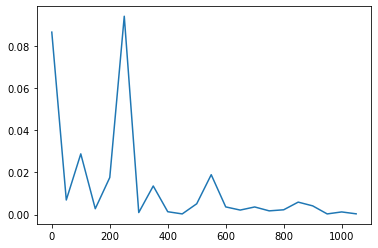

In [91]:
plt.plot(epochlist,costlist)